In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/latest-1/latest (1).csv
/kaggle/input/latest/latest.csv
/kaggle/input/disaster-ml-model-h5-file/disaster.h5
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/new-data/new_data (1).csv
/kaggle/input/new-test/latest_test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%config Completer.use_jedi = False

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk import sent_tokenize
from nltk import word_tokenize


from nltk.corpus import stopwords


from collections import Counter

!pip install contractions
import contractions

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant

In [3]:
data=pd.read_csv('../input/nlp-getting-started/train.csv')

In [4]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
len(data)

7613

<AxesSubplot:>

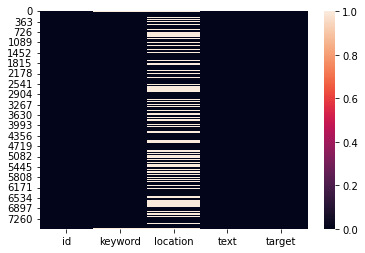

In [7]:
sns.heatmap(data.isnull())

In [8]:
data[data['location'].isnull()].count()

id          2533
keyword     2472
location       0
text        2533
target      2533
dtype: int64

In [9]:
data.iloc[0:,3:5]

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [10]:
!pip install contractions

In [11]:
new_data=data.iloc[0:,3:5]

In [12]:
import contractions

In [13]:
new_data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [14]:
text=new_data['text']

In [15]:
text[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [16]:
new_data['keyword']=data['keyword']

In [17]:
#new_data.rename(columns={0:'keyword'},inplace=True)

In [18]:
new_data.head()

,text,target,keyword
0,Our Deeds are the Reason of this #earthquake M...,1,NaN
1,Forest fire near La Ronge Sask. Canada,1,NaN
2,All residents asked to 'shelter in place' are ...,1,NaN
3,"13,000 people receive #wildfires evacuation or...",1,NaN
4,Just got sent this photo from Ruby #Alaska as ...,1,NaN


In [19]:
import numpy as np
#new_data=np.where(new_data['keyword'].isnull(),'',new_data['keyword'])

In [20]:
new_data['keyword'].fillna('',inplace=True)

$a^2$

In [21]:
new_data.head()

,text,target,keyword
0,Our Deeds are the Reason of this #earthquake M...,1,
1,Forest fire near La Ronge Sask. Canada,1,
2,All residents asked to 'shelter in place' are ...,1,
3,"13,000 people receive #wildfires evacuation or...",1,
4,Just got sent this photo from Ruby #Alaska as ...,1,


In [22]:
text=new_data['text']

In [23]:
new_data

,text,target,keyword
0,Our Deeds are the Reason of this #earthquake M...,1,
1,Forest fire near La Ronge Sask. Canada,1,
2,All residents asked to 'shelter in place' are ...,1,
3,"13,000 people receive #wildfires evacuation or...",1,
4,Just got sent this photo from Ruby #Alaska as ...,1,
...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,
7609,@aria_ahrary @TheTawniest The out of control w...,1,
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,
7611,Police investigating after an e-bike collided ...,1,


In [24]:
new_data['text'][len(new_data)-1]

'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d'

## Expanding words i.e. can't to cannot

In [25]:
a=0
text=[]
for sent in new_data['text']:
    a=a+1
    #print(a)
    sentence=[]
    for word in sent.split():
        #print(word)
        sentence.append(contractions.fix(word))
        
    text.append(' '.join(sentence))

In [26]:
text[15]

'what is up man?'

## removing special characters

In [27]:
import re

text_without_special_char=[]

for sentence in text:
    t=re.sub('[^A-Za-z0-9]+',' ',sentence)
    text_without_special_char.append(t)

In [28]:
new_data['text_without_special_char']=text_without_special_char

In [29]:
new_data

,text,target,keyword,text_without_special_char
0,Our Deeds are the Reason of this #earthquake M...,1,,Our Deeds are the Reason of this earthquake Ma...
1,Forest fire near La Ronge Sask. Canada,1,,Forest fire near La Ronge Sask Canada
2,All residents asked to 'shelter in place' are ...,1,,All residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",1,,13 000 people receive wildfires evacuation ord...
4,Just got sent this photo from Ruby #Alaska as ...,1,,Just got sent this photo from Ruby Alaska as s...
...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,,Two giant cranes holding a bridge collapse int...
7609,@aria_ahrary @TheTawniest The out of control w...,1,,aria ahrary TheTawniest The out of control wi...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,,M1 94 01 04 UTC 5km S of Volcano Hawaii http t...
7611,Police investigating after an e-bike collided ...,1,,Police investigating after an e bike collided ...


## removing stopwods

In [30]:

def remove_stopwords(text):
    without_stopwords=[]
    for sentence in text:
        sentence=sentence.lower()
        token=word_tokenize(sentence)
        token=[word for word in token if word not in set(stopwords.words('english'))]
        token=' '.join(token)
        without_stopwords.append(token)
    return without_stopwords

In [31]:
without_stopwords=remove_stopwords(text_without_special_char)

In [32]:
without_stopwords[:5]

['deeds reason earthquake may allah forgive us',
 'forest fire near la ronge sask canada',
 'residents asked shelter place notified officers evacuation shelter place orders expected',
 '13 000 people receive wildfires evacuation orders california',
 'got sent photo ruby alaska smoke wildfires pours school']

In [33]:
new_data['without_stopwords']=without_stopwords

In [34]:
new_data.head()

,text,target,keyword,text_without_special_char,without_stopwords
0,Our Deeds are the Reason of this #earthquake M...,1,,Our Deeds are the Reason of this earthquake Ma...,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,,Forest fire near La Ronge Sask Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,,All residents asked to shelter in place are be...,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,,13 000 people receive wildfires evacuation ord...,13 000 people receive wildfires evacuation ord...
4,Just got sent this photo from Ruby #Alaska as ...,1,,Just got sent this photo from Ruby Alaska as s...,got sent photo ruby alaska smoke wildfires pou...


In [35]:
without_stopwords[-10:-1]

['officials say quarantine place alabama home possible ebola case developing symptoms http co rqkk15uhey',
 'worldnews fallen powerlines g link tram update fire crews evacuated 30 passengers tr http co eysvvza7qm',
 'flip side walmart bomb everyone evacuate stay tuned blow',
 'suicide bomber kills 15 saudi security site mosque reuters via world google news wall http co nf4iculoje',
 'stormchase violent record breaking ef 5 el reno oklahoma tornado nearly runs http co 3sicroaanz http co i27oa0hisp',
 'two giant cranes holding bridge collapse nearby homes http co stfmbbzfb5',
 'aria ahrary thetawniest control wild fires california even northern part state troubling',
 'm1 94 01 04 utc 5km volcano hawaii http co zdtoyd8ebj',
 'police investigating e bike collided car little portugal e bike rider suffered serious non life threatening injuries']

## removing urls part from text columns

In [36]:
def remove_urls(text):
    without_urls=[]
    for sentence in text:
        search=re.search('http',sentence)
        if bool(search):
            without_urls.append(sentence[0:search.start()])
        else:
            without_urls.append(sentence)
    return without_urls

In [37]:
without_urls=remove_urls(without_stopwords)

In [38]:
new_data['without_urls']=without_urls

In [39]:
without_urls[-10:-1]

['officials say quarantine place alabama home possible ebola case developing symptoms ',
 'worldnews fallen powerlines g link tram update fire crews evacuated 30 passengers tr ',
 'flip side walmart bomb everyone evacuate stay tuned blow',
 'suicide bomber kills 15 saudi security site mosque reuters via world google news wall ',
 'stormchase violent record breaking ef 5 el reno oklahoma tornado nearly runs ',
 'two giant cranes holding bridge collapse nearby homes ',
 'aria ahrary thetawniest control wild fires california even northern part state troubling',
 'm1 94 01 04 utc 5km volcano hawaii ',
 'police investigating e bike collided car little portugal e bike rider suffered serious non life threatening injuries']

In [40]:
#Checking if any https substring is left working properly
for i in without_urls:
    if bool(re.search('http',i)):
        print(i)
        break

In [41]:
data['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

## Saving new_data csv

In [42]:
new_data.to_csv('./new_data.csv')

In [43]:
! pip install openpyxl

     |████████████████████████████████| 242 kB 893 kB/s            


In [44]:
new_data.to_excel('./new_data.xlsx')

In [45]:
# Reading saved csv
new_data=pd.read_csv('../input/new-data/new_data (1).csv')

In [46]:
new_data.head()

,Unnamed: 0,text,target,keyword,text_without_special_char,without_stopwords,without_urls
0,0,Our Deeds are the Reason of this #earthquake M...,1,NaN,Our Deeds are the Reason of this earthquake Ma...,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us
1,1,Forest fire near La Ronge Sask. Canada,1,NaN,Forest fire near La Ronge Sask Canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,2,All residents asked to 'shelter in place' are ...,1,NaN,All residents asked to shelter in place are be...,residents asked shelter place notified officer...,residents asked shelter place notified officer...
3,3,"13,000 people receive #wildfires evacuation or...",1,NaN,13 000 people receive wildfires evacuation ord...,13 000 people receive wildfires evacuation ord...,13 000 people receive wildfires evacuation ord...
4,4,Just got sent this photo from Ruby #Alaska as ...,1,NaN,Just got sent this photo from Ruby Alaska as s...,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...


In [47]:
new_data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [48]:
text=new_data['without_urls']

In [112]:
str(test['without_urls'][0])

'happened terrible car crash'

In [122]:
def without_numbers(text):
    without_numbers=[]
    #a=0
    for sentence in text:
        #a=a+1
        #print(a)
        
        t=re.sub('[^A-Za-z]',' ',str(sentence))
        without_numbers.append(t)
    return without_numbers

In [50]:
text[0]

'deeds reason earthquake may allah forgive us'

In [51]:
without_numbers=without_numbers(text)

In [52]:
new_data['without_numbers']=without_numbers

In [53]:
new_data.head()

,Unnamed: 0,text,target,keyword,text_without_special_char,without_stopwords,without_urls,without_numbers
0,0,Our Deeds are the Reason of this #earthquake M...,1,NaN,Our Deeds are the Reason of this earthquake Ma...,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us
1,1,Forest fire near La Ronge Sask. Canada,1,NaN,Forest fire near La Ronge Sask Canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,2,All residents asked to 'shelter in place' are ...,1,NaN,All residents asked to shelter in place are be...,residents asked shelter place notified officer...,residents asked shelter place notified officer...,residents asked shelter place notified officer...
3,3,"13,000 people receive #wildfires evacuation or...",1,NaN,13 000 people receive wildfires evacuation ord...,13 000 people receive wildfires evacuation ord...,13 000 people receive wildfires evacuation ord...,people receive wildfires evacuation ord...
4,4,Just got sent this photo from Ruby #Alaska as ...,1,NaN,Just got sent this photo from Ruby Alaska as s...,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...


In [54]:
without_numbers[:5]

['deeds reason earthquake may allah forgive us',
 'forest fire near la ronge sask canada',
 'residents asked shelter place notified officers evacuation shelter place orders expected',
 '       people receive wildfires evacuation orders california',
 'got sent photo ruby alaska smoke wildfires pours school']

In [55]:
new_data.to_csv('latest.csv')

In [56]:
! cp './latest.csv' '../input/new-data/'

cp: cannot create regular file '../input/new-data/latest.csv': Read-only file system


In [57]:
latest=pd.read_csv('../input/latest/latest.csv')

In [58]:
latest.head()

,Unnamed: 0,Unnamed: 0.1,text,target,keyword,text_without_special_char,without_stopwords,without_urls,without_numbers
0,0,0,Our Deeds are the Reason of this #earthquake M...,1,NaN,Our Deeds are the Reason of this earthquake Ma...,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us
1,1,1,Forest fire near La Ronge Sask. Canada,1,NaN,Forest fire near La Ronge Sask Canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,2,2,All residents asked to 'shelter in place' are ...,1,NaN,All residents asked to shelter in place are be...,residents asked shelter place notified officer...,residents asked shelter place notified officer...,residents asked shelter place notified officer...
3,3,3,"13,000 people receive #wildfires evacuation or...",1,NaN,13 000 people receive wildfires evacuation ord...,13 000 people receive wildfires evacuation ord...,13 000 people receive wildfires evacuation ord...,people receive wildfires evacuation ord...
4,4,4,Just got sent this photo from Ruby #Alaska as ...,1,NaN,Just got sent this photo from Ruby Alaska as s...,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...


In [59]:
text=latest['without_numbers']

In [61]:
#" ".join(latest[latest['target']==1]['without_numbers']).split()

In [62]:
latest['without_numbers'].isnull().sum()

58

In [63]:
latest['req_text']=latest['without_numbers'].fillna(' ')

## most common words in text

In [64]:
word_count=Counter(" ".join(latest[latest['target']==1]['req_text']).split()).most_common(100)

In [65]:
word_count

[('fire', 179),
 ('amp', 129),
 ('disaster', 119),
 ('news', 118),
 ('california', 114),
 ('suicide', 111),
 ('police', 109),
 ('people', 104),
 ('like', 90),
 ('hiroshima', 90),
 ('storm', 89),
 ('pm', 86),
 ('killed', 86),
 ('fires', 85),
 ('families', 81),
 ('train', 78),
 ('crash', 76),
 ('bomb', 76),
 ('emergency', 75),
 ('two', 74),
 ('buildings', 74),
 ('mh', 72),
 ('nuclear', 69),
 ('attack', 68),
 ('bombing', 68),
 ('video', 68),
 ('wildfire', 68),
 ('old', 68),
 ('accident', 66),
 ('one', 65),
 ('dead', 64),
 ('get', 63),
 ('northern', 63),
 ('burning', 63),
 ('legionnaires', 61),
 ('car', 59),
 ('bomber', 59),
 ('still', 57),
 ('war', 57),
 ('homes', 57),
 ('typhoon', 57),
 ('obama', 56),
 ('year', 56),
 ('fatal', 55),
 ('today', 55),
 ('new', 55),
 ('atomic', 55),
 ('years', 53),
 ('japan', 53),
 ('collapse', 52),
 ('may', 51),
 ('us', 50),
 ('man', 50),
 ('debris', 50),
 ('forest', 49),
 ('near', 49),
 ('watch', 49),
 ('first', 48),
 ('water', 48),
 ('mass', 48),
 ('latest

## Some extra operations

In [67]:
with open('../input/latest/')

SyntaxError: invalid syntax (4258398972.py, line 1)

In [69]:
latest.to_csv('latest.csv')

In [70]:
latest=pd.read_csv('../input/latest-1/latest (1).csv')

In [71]:
latest.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,text,target,keyword,text_without_special_char,without_stopwords,without_urls,without_numbers,req_text
0,0,0,0,Our Deeds are the Reason of this #earthquake M...,1,NaN,Our Deeds are the Reason of this earthquake Ma...,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us
1,1,1,1,Forest fire near La Ronge Sask. Canada,1,NaN,Forest fire near La Ronge Sask Canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,2,2,2,All residents asked to 'shelter in place' are ...,1,NaN,All residents asked to shelter in place are be...,residents asked shelter place notified officer...,residents asked shelter place notified officer...,residents asked shelter place notified officer...,residents asked shelter place notified officer...
3,3,3,3,"13,000 people receive #wildfires evacuation or...",1,NaN,13 000 people receive wildfires evacuation ord...,13 000 people receive wildfires evacuation ord...,13 000 people receive wildfires evacuation ord...,people receive wildfires evacuation ord...,people receive wildfires evacuation ord...
4,4,4,4,Just got sent this photo from Ruby #Alaska as ...,1,NaN,Just got sent this photo from Ruby Alaska as s...,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...


In [72]:
latest[latest['without_numbers'].isnull()]['keyword'].isnull().sum()

0

In [74]:
latest

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,text,target,keyword,text_without_special_char,without_stopwords,without_urls,without_numbers,req_text
0,0,0,0,Our Deeds are the Reason of this #earthquake M...,1,NaN,Our Deeds are the Reason of this earthquake Ma...,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us
1,1,1,1,Forest fire near La Ronge Sask. Canada,1,NaN,Forest fire near La Ronge Sask Canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,2,2,2,All residents asked to 'shelter in place' are ...,1,NaN,All residents asked to shelter in place are be...,residents asked shelter place notified officer...,residents asked shelter place notified officer...,residents asked shelter place notified officer...,residents asked shelter place notified officer...
3,3,3,3,"13,000 people receive #wildfires evacuation or...",1,NaN,13 000 people receive wildfires evacuation ord...,13 000 people receive wildfires evacuation ord...,13 000 people receive wildfires evacuation ord...,people receive wildfires evacuation ord...,people receive wildfires evacuation ord...
4,4,4,4,Just got sent this photo from Ruby #Alaska as ...,1,NaN,Just got sent this photo from Ruby Alaska as s...,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...,...,...,...,...,...,...,...
7608,7608,7608,7608,Two giant cranes holding a bridge collapse int...,1,NaN,Two giant cranes holding a bridge collapse int...,two giant cranes holding bridge collapse nearb...,two giant cranes holding bridge collapse nearb...,two giant cranes holding bridge collapse nearb...,two giant cranes holding bridge collapse nearb...
7609,7609,7609,7609,@aria_ahrary @TheTawniest The out of control w...,1,NaN,aria ahrary TheTawniest The out of control wi...,aria ahrary thetawniest control wild fires cal...,aria ahrary thetawniest control wild fires cal...,aria ahrary thetawniest control wild fires cal...,aria ahrary thetawniest control wild fires cal...
7610,7610,7610,7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,NaN,M1 94 01 04 UTC 5km S of Volcano Hawaii http t...,m1 94 01 04 utc 5km volcano hawaii http co zdt...,m1 94 01 04 utc 5km volcano hawaii,m utc km volcano hawaii,m utc km volcano hawaii
7611,7611,7611,7611,Police investigating after an e-bike collided ...,1,NaN,Police investigating after an e bike collided ...,police investigating e bike collided car littl...,police investigating e bike collided car littl...,police investigating e bike collided car littl...,police investigating e bike collided car littl...


## splitting data into training and validation set

In [75]:
train_percentage=0.80
train_number=int(len(latest['req_text'])*train_percentage)
train_sentences=latest['req_text'][:train_number]
train_target=latest['target'][:train_number]

validation_sentences=latest['req_text'][train_number:]
validation_target=latest['target'][train_number:]

### length of training set

In [76]:
train_number

6090

## Checking no of unique words to set vocabulary size for padding

In [77]:
tokenizer_text=Tokenizer()
tokenizer_text.fit_on_texts(latest['req_text'])
word_index=tokenizer_text.word_index
len(word_index)

15443

In [78]:
vocab_size=15000

##Oov tokens are out of vocabulary tokens used to replace unknown words.
oov_token='<00V>'

In [79]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_token)
tokenizer.fit_on_texts(latest['req_text'])
word_index=tokenizer.word_index

In [80]:
train_sequences=tokenizer.texts_to_sequences(train_sentences)

In [81]:
train_sentences[0:5]

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked shelter place notified officer...
3           people receive wildfires evacuation ord...
4    got sent photo ruby alaska smoke wildfires pou...
Name: req_text, dtype: object

## Length of sentences

In [82]:
length_of_sent=[]
for i in train_sequences:
    length_of_sent.append(len(i))
    
pd.DataFrame(length_of_sent,columns=['length']).describe()

,length
count,6090.000000
mean,8.743186
std,3.722126
min,0.000000
25%,6.000000
50%,9.000000
75%,11.000000
max,25.000000


<AxesSubplot:ylabel='Count'>

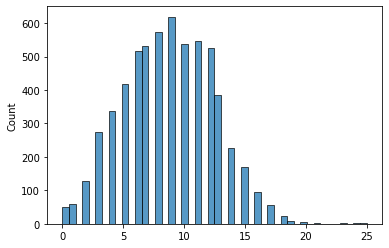

In [83]:
sns.histplot(length_of_sent)

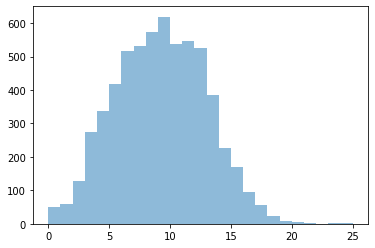

In [84]:
plt.hist(length_of_sent,bins=25,alpha=0.5)
plt.show()

## Creating padding 

In [85]:
train_padding=pad_sequences(train_sequences,maxlen=20,padding='post',truncating='post')

In [86]:
train_padding[0]

array([4084,  689,  225,   56, 1514, 4085,   13,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [87]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padding = pad_sequences(validation_sequences,padding='post',maxlen=20,truncating='post')

print(len(validation_sequences))
print(validation_padding.shape)

1523
(1523, 20)


### Loading test file

In [123]:
test=pd.read_csv('../input/nlp-getting-started/test.csv')

## Doing operation on test.csv that were done on train.csv

In [124]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [125]:
a=0
text=[]
for sent in test['text']:
    a=a+1
    #print(a)
    sentence=[]
    for word in sent.split():
        #print(word)
        sentence.append(contractions.fix(word))
        
    text.append(' '.join(sentence))
    
text_without_special_char=[]

for sentence in text:
    t=re.sub('[^A-Za-z0-9]+',' ',sentence)
    text_without_special_char.append(t)   
    
test['text_without_special_char']=text_without_special_char   

test['without_stopwords']=remove_stopwords(test['text_without_special_char'])

test['without_urls']=remove_urls(test['without_stopwords'])

test['without_numbers']=without_numbers(test['without_urls'])

test['req_text']=test['without_numbers'].fillna(' ')


In [126]:
type(test['without_urls'])

pandas.core.series.Series

In [128]:
test_sequences = tokenizer.texts_to_sequences(test['req_text'])
test_padding = pad_sequences(test_sequences,padding='post',maxlen=20,truncating='post')

print(len(test_sequences))
print(test_padding.shape)

3263
(3263, 20)


## Setting Earlystopping and ReduceLROnPlateau for Training

In [129]:

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               min_delta=0.005,
                               patience=3, 
                               verbose=1, 
                               mode='auto')

from keras.callbacks import ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                 patience=1, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.000001)

In [130]:
import tensorflow as tf

## Preparing Model from scratch

In [131]:
embedding_dim = 32
model = tf.keras.Sequential([
              tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=20),
              tf.keras.layers.GlobalAveragePooling1D(),
              tf.keras.layers.Dense(24,activation='relu'),
              tf.keras.layers.Dropout(0.1),
              tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 32)            480000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                792       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 480,817
Trainable params: 480,817
Non-trainable params: 0
_________________________________________________________________



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

## Architecture of the model

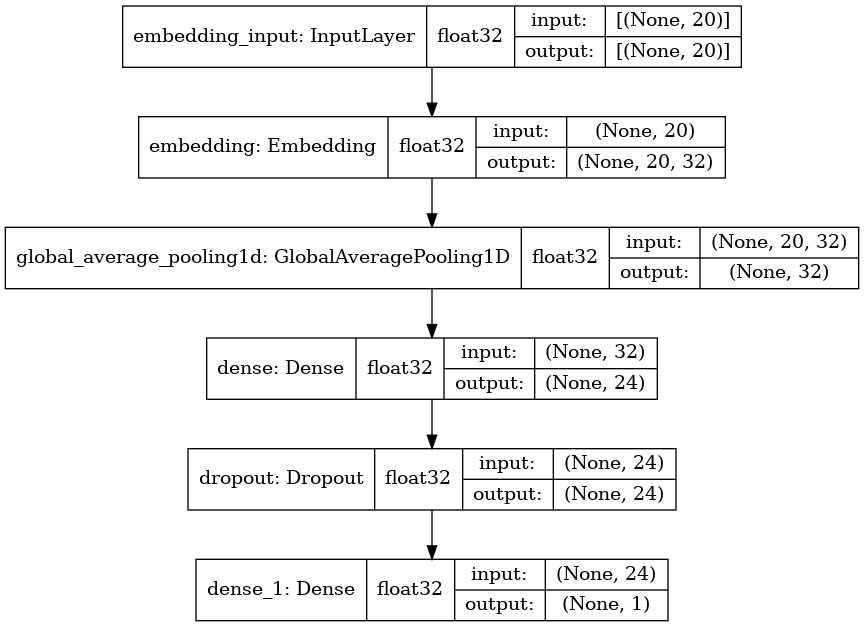

In [132]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='arch.png',show_dtype=True,show_shapes=True,show_layer_names=True)

In [133]:
num_epochs = 15
history = model.fit(train_padding,train_target,epochs=num_epochs,
                    validation_data=(validation_padding,validation_target),verbose=1,
                    callbacks=[lr_reduction])

2021-12-31 08:44:45.854300: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
191/191 [==============================] - 2s 6ms/step - loss: 0.6558 - accuracy: 0.6034 - val_loss: 0.6216 - val_accuracy: 0.7472
Epoch 2/15
191/191 [==============================] - 1s 4ms/step - loss: 0.4740 - accuracy: 0.8172 - val_loss: 0.4760 - val_accuracy: 0.7965
Epoch 3/15
191/191 [==============================] - 1s 4ms/step - loss: 0.3148 - accuracy: 0.8852 - val_loss: 0.4621 - val_accuracy: 0.7814

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/15
191/191 [==============================] - 1s 4ms/step - loss: 0.2309 - accuracy: 0.9202 - val_loss: 0.4536 - val_accuracy: 0.7958

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 5/15
191/191 [==============================] - 1s 5ms/step - loss: 0.1967 - accuracy: 0.9340 - val_loss: 0.4624 - val_accuracy: 0.7820

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 6/15
191/191 [===========================

In [134]:
test.to_csv('latest_test.csv')

## Saving Model

In [135]:
model.save('disaster.h5')

In [ ]:
import pickle
with open('history.pkl','wb') as f:
   pickle.dump(history,f)

In [136]:
val_pred=model.predict(validation_padding,batch_size=32)

In [137]:
np.round(val_pred[:20])

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [138]:
validation_target[:20]

6090    0
6091    1
6092    0
6093    0
6094    0
6095    1
6096    0
6097    0
6098    0
6099    0
6100    1
6101    0
6102    0
6103    0
6104    0
6105    0
6106    0
6107    0
6108    1
6109    0
Name: target, dtype: int64

In [139]:
from sklearn.metrics import classification_report

print(classification_report(np.round(val_pred),validation_target))

              precision    recall  f1-score   support

         0.0       0.81      0.80      0.80       825
         1.0       0.76      0.77      0.77       698

    accuracy                           0.79      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



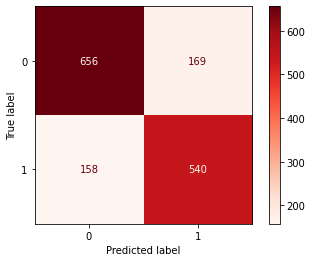

In [140]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(np.round(val_pred),validation_target), display_labels=np.unique(train_target))
disp.plot(cmap='Reds') 
plt.grid(False)

## Not a perfect notebook but imrpoving everyday
## Do give suggestions to improve the model
## And upvote this notebook to encourge me to make more projects
## Thank You